In [1]:
import numpy as np
import pandas as pd

import nltk
import spacy

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", 
                       "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                       "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", 
                       "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
                       "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
                       "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", 
                       "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                       "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                       "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                       "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                       "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                       "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                       "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                       "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                       "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", 
                       "that's": "that is", "there'd": "there would", "there'd've": "there would have", 
                       "there's": "there is", "here's": "here is","they'd": "they would", 
                       "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", 
                       "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                       "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", 
                       "what'll've": "what will have", "what're": "what are",  "what's": "what is", 
                       "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", 
                       "where's": "where is", "where've": "where have", "who'll": "who will", 
                       "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
                       "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                       "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
                       "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
                       "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
                       "you're": "you are", "you've": "you have" }

## Naive Bayes Classifier
- Loading dataset
- Visualization
- Preprocessing
- Model creation
- Evaluation

#### Loading the dataset

In [3]:
df_sms = pd.read_csv('data/spam.csv',encoding='latin-1')
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df_sms['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
df_sms['length'] = df_sms['sms'].apply(len)

#### Visualization

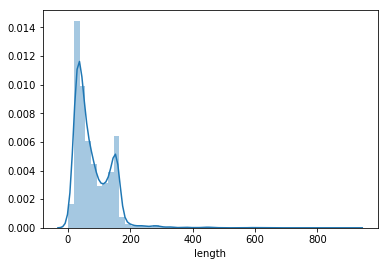

In [6]:
sns.distplot(df_sms['length'])
plt.show()

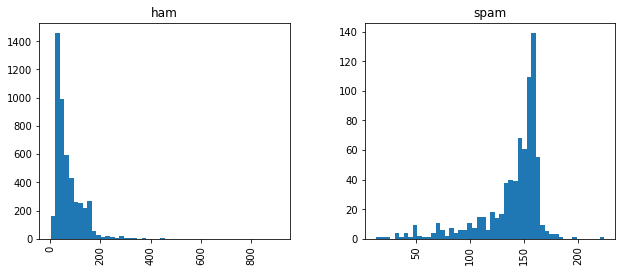

In [7]:
df_sms.hist(column='length', by='label', bins=50,figsize=(10,4))
plt.show()

In [8]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
df_sms.head()

,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Scikitlearn Count Vectorizer for Preprocessing
- Normalize to lower case
- Remove punctuation
- Tokenize
- Stop word removal
- Bag-of-words representation

In [9]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [11]:
documents = ["Hi Mom, happy Thanksgiving, I know I'm your favorite.",
            "However, I never read rubrics when I do peer reviews.",
            "Epstein did not kill himself!"]

In [12]:
# count_vector = CountVectorizer()
count_vector = CountVectorizer(stop_words=stopWords)

count_vector.fit(documents)
count_vector.get_feature_names()

['epstein',
 'favorite',
 'happy',
 'hi',
 'however',
 'kill',
 'know',
 'mom',
 'never',
 'peer',
 'read',
 'reviews',
 'rubrics',
 'thanksgiving']

In [13]:
doc_array = count_vector.transform(documents).toarray()
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,epstein,favorite,happy,hi,however,kill,know,mom,never,peer,read,reviews,rubrics,thanksgiving
0,0,1,1,1,0,0,1,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,1,1,1,1,1,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### Preprocessing the dataset
- Split the dataset into train and test subsets
- Apply count vectorizer to both subset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], df_sms['label'],test_size=0.20)

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

#### Creating the model - Naive Bayes Classifier

In [15]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
predictions = naive_bayes.predict(testing_data)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9874439461883409
Precision score: 0.9586206896551724
Recall score: 0.9455782312925171
F1 score: 0.952054794520548


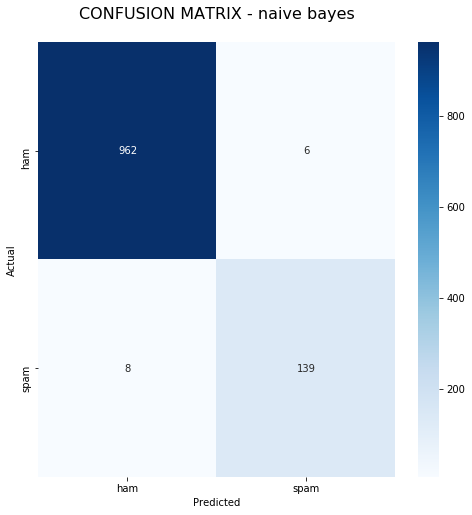

In [20]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=['ham','spam'], 
            yticklabels=['ham','spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - naive bayes\n", size=16);

## Logistic Regression
- Loading dataset
- Visualization
- Preprocessing
- Model creation
- Evaluation

#### Loading the dataset

In [21]:
df = pd.read_csv('data/financial_product_complaints.csv', index_col = 0)

In [22]:
df.head()

,Product,Consumer_complaint
0,"Credit reporting, repair, or other",it is the repeated fraud attempt from experian...
1,Debt collection,"We received multiple voice mails from Weltman,..."
2,Debt collection,Deactivated my car whenever I was a day late m...
3,Student loan,My complaint is regarding my Student Loan Serv...
4,Debt collection,Syndicated Office Systems is currently reporti...


In [23]:
pd.DataFrame(df.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Debt collection
2,Student loan
3,Checking or savings account
4,Mortgage
5,"Payday loan, title loan, or personal loan"
6,Vehicle loan or lease
7,Credit card or prepaid card
8,Bank account or service
9,Consumer Loan


In [24]:
# Create a new column 'category_id' with encoded categories 
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates()


category_id_df

,Product,category_id
0,"Credit reporting, repair, or other",0
1,Debt collection,1
3,Student loan,2
7,Checking or savings account,3
10,Mortgage,4
14,"Payday loan, title loan, or personal loan",5
24,Vehicle loan or lease,6
47,Credit card or prepaid card,7
67,Bank account or service,8
70,Consumer Loan,9


In [25]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df.head()

,Product,Consumer_complaint,category_id
0,"Credit reporting, repair, or other",it is the repeated fraud attempt from experian...,0
1,Debt collection,"We received multiple voice mails from Weltman,...",1
2,Debt collection,Deactivated my car whenever I was a day late m...,1
3,Student loan,My complaint is regarding my Student Loan Serv...,2
4,Debt collection,Syndicated Office Systems is currently reporti...,1


#### Text preprocessing
- convert words to vectors
- use TF-IDF to determine word importance

__TF-IDF__ is the product of the __TF__ and __IDF__ scores of the term.<br><br> $$\text{TF-IDF}=\frac{\text{TF}}{\text{IDF}}$$<br>

__Term Frequency :__ This summarizes how often a given word appears within a document.

$$\text{TF} = \frac{\text{Number of times the term appears in the doc}}{\text{Total number of words in the doc}}$$<br><br>
__Inverse Document Frequency:__ This downscales words that appear a lot across documents. A term has a high IDF score if it appears in a few documents. Conversely, if the term is very common among documents (i.e., “the”, “a”, “is”), the term would have a low IDF score.<br>

$$\text{IDF} = \ln\left(\frac{\text{Number of docs}}{\text{Number docs the term appears in}} \right)$$<br>

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

__n-gram__ is a contiguous sequence of n items from a given sample of text 

__unigrams__ are single words

__bigram__ are double words

In [27]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')

# use tfidf to transform complaints into vectors
features = tfidf.fit_transform(df.Consumer_complaint).toarray()

labels = df.category_id

In [28]:
features.shape

(10000, 28342)

In [29]:
from sklearn.feature_selection import chi2

# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n %s:" %(Product),'\n------------')
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


 Bank account or service: 
------------
  * Most Correlated Unigrams are: bank, deposit, overdraft
  * Most Correlated Bigrams are: overdraft fee, checking account, overdraft fees

 Checking or savings account: 
------------
  * Most Correlated Unigrams are: deposited, checking, overdraft
  * Most Correlated Bigrams are: debit card, savings account, checking account

 Consumer Loan: 
------------
  * Most Correlated Unigrams are: dealer, vehicle, car
  * Most Correlated Bigrams are: credit acceptance, leased vehicle, acceptance corp

 Credit card or prepaid card: 
------------
  * Most Correlated Unigrams are: express, citi, card
  * Most Correlated Bigrams are: synchrony bank, american express, credit card

 Credit reporting, repair, or other: 
------------
  * Most Correlated Unigrams are: experian, report, equifax
  * Most Correlated Bigrams are: credit bureaus, credit file, credit report

 Debt collection: 
------------
  * Most Correlated Unigrams are: collect, collection, debt
 

In [30]:
X = df['Consumer_complaint'] # complaint documents
y = df['Product'] # Target labels we want to predict (13 different product types)

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score



In [35]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.20)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))

Accuracy score: 0.758


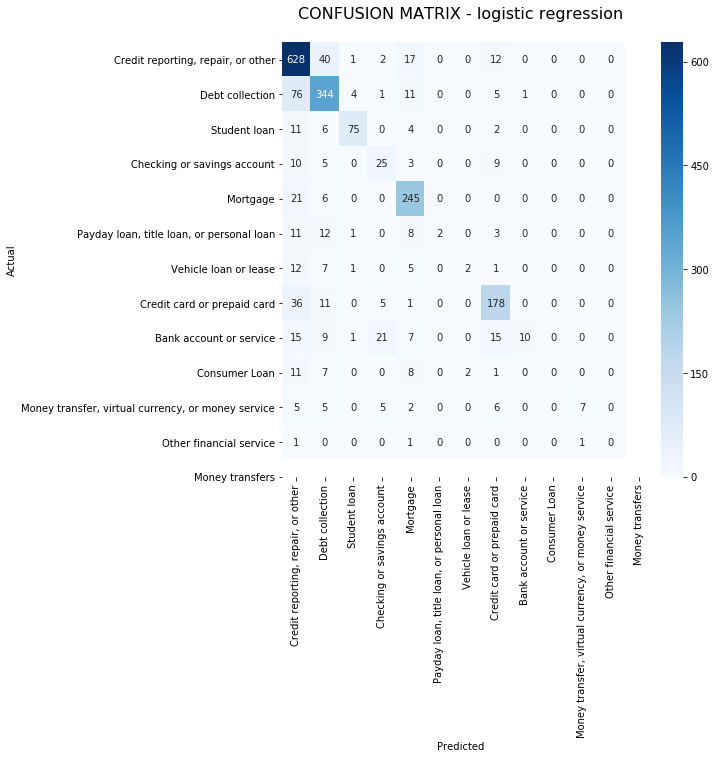

In [38]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - logistic regression\n", size=16);